In [24]:
#Importing Library matplotlib, pandas, numpy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
#CSV File Imporintg

data = pd.read_csv("65 Years of Weather Data Bangladesh (1948 - 2013).csv")

data

,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,NaN,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,NaN,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1953.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21115,21115,Teknaf,2009,12,30.3,16.5,0.0,72.0,2.800000,0.9,8.700000,41998,734765.4,308914.1,20.87,92.26,4,2009.12
21116,21116,Teknaf,2010,12,31.7,16.7,193.0,79.0,2.400000,1.4,5.500000,41998,734765.4,308914.1,20.87,92.26,4,2010.12
21117,21117,Teknaf,2011,12,31.5,16.4,0.0,73.0,0.000000,1.5,7.400000,41998,734765.4,308914.1,20.87,92.26,4,2011.12
21118,21118,Teknaf,2012,12,30.0,15.8,NaN,70.0,1.800000,0.2,9.000000,41998,734765.4,308914.1,20.87,92.26,4,2012.12


In [26]:
#Changing Data Type Int to String
data["Month"] = data["Month"].astype(str)

#Replace Data Value
data["Month"] = data["Month"].replace(["1","2","3","4","5","6","7","8","9","10","11","12"],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

In [27]:
#Extracting Dhaka District Data
dhaka = data[(data["Station Names"] == "Dhaka") & (data["YEAR"] > 2008)]

#Sorting Dhaka District Data by Year in Ascending Order
dhaka = dhaka.sort_values(by=["YEAR"],ascending=True)

In [28]:
#

dhk = dhaka.groupby('YEAR',as_index=False)
dhk = dhk.agg(np.mean)

#Delete Rows from dhk
dhk = dhk.drop(["Unnamed: 0","X_COR",
                "Y_COR","LATITUDE",
                "LONGITUDE"],axis=1)

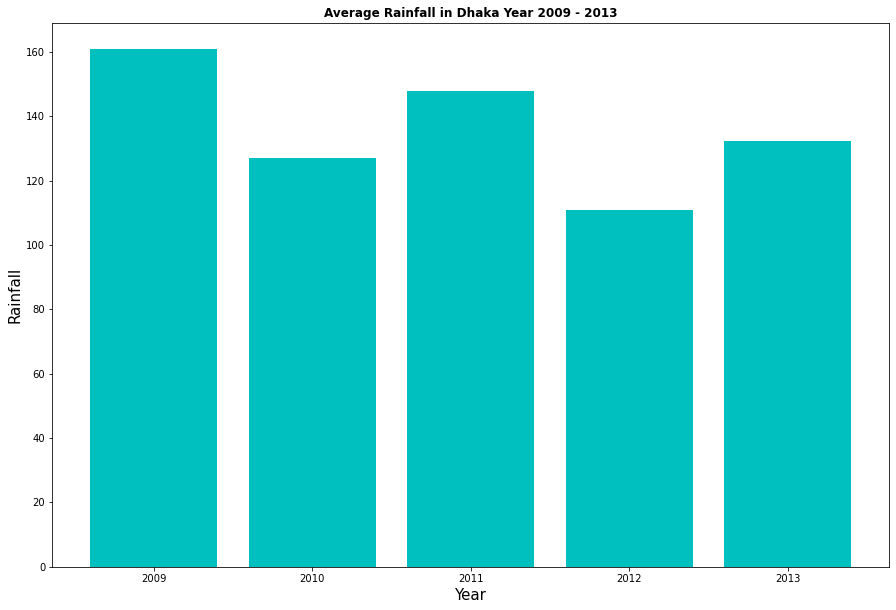

In [29]:
#Create a Figure for Bar Plot
fig, ax = plt.subplots(figsize = (15,10))

ax.bar(dhk["YEAR"],height=dhk["Rainfall"],color = 'c');

#Setting Label
ax.set_xlabel("Year",fontsize=15,fontweight='roman',fontname="Sans")
ax.set_ylabel("Rainfall",fontsize=15,fontweight='roman',fontname="Sans")
ax.set_title("Average Rainfall in Dhaka Year 2009 - 2013",fontname="Sans",fontweight='bold');

#Saving Plot
fig.savefig("Bar_Plot.png")

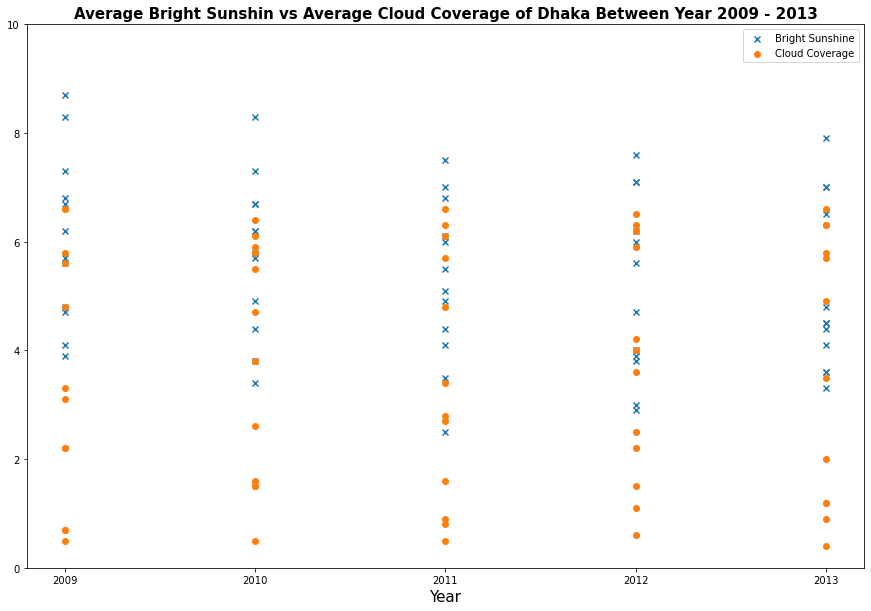

In [30]:
#Create a Figure for Scatter Plot
fig, ax = plt.subplots(figsize = (15,10))

#1st Scatter Plot
scatter1 = ax.scatter(x = dhaka["YEAR"],
                      y = dhaka["Bright Sunshine"],
                      marker = "x");

#2nd Scatter Plot
scatter2 = ax.scatter(x = dhaka["YEAR"],
                      y = dhaka["Cloud Coverage"],
                      marker = "o");
#Setting Y-axis Limit
ax.set_ylim([0,10])

ax.set_xticks([2009,2010,2011,2012,2013])

#Setting Legend Data
ax.legend((scatter1,scatter2),("Bright Sunshine","Cloud Coverage"),
          scatterpoints=1,
          loc='upper right',
          fontsize=10);

#Setting X-axis Label and Title
ax.set_xlabel("Year",fontsize=15,fontweight='roman',fontname="Sans")

ax.set_title("Average Bright Sunshin vs Average Cloud Coverage of Dhaka Between Year 2009 - 2013",
             fontsize=15,fontweight='bold',fontname="Sans");

#Saving Plot
fig.savefig("Scatter_Plot.png")

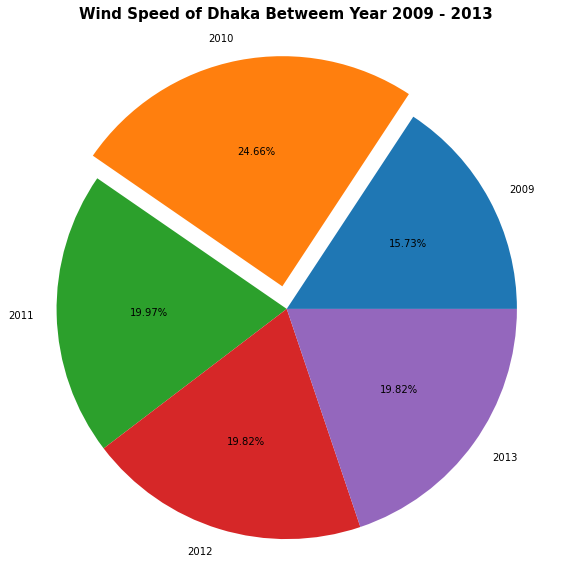

In [31]:
#Create a Figure for Pie Plot
fig, ax = plt.subplots(figsize = (10,10))

explode = (0,0.1, 0, 0, 0)

ax.pie(dhk["Wind Speed"],labels = dhk["YEAR"],
       autopct='%1.2f%%',explode=explode,startangle=0);

ax.axis("equal");

ax.set_title("Wind Speed of Dhaka Betweem Year 2009 - 2013",fontsize=15,fontweight='bold',fontname="Sans");

#Saving Plot
fig.savefig("Pie_Plot.png")

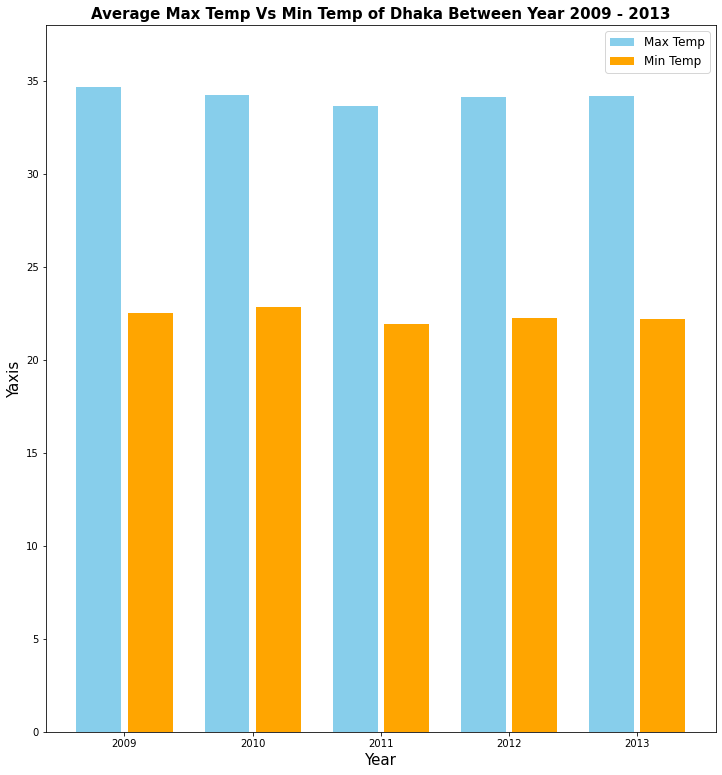

In [32]:
#Creating Figure For Grouped Bar Chart
fig, ax =  plt.subplots(figsize = (12,13))

width = 0.35
x = np.arange(5)

bar1 = ax.bar(x-0.2,dhk["Max Temp"],width,
              label="Max Temp",color = "skyblue")

bar2 = ax.bar(x+0.2,dhk["Min Temp"],width,
              label="Min Temp",color = "orange")


plt.xticks(x, ['2009', '2010', '2011', '2012', '2013']);

#Setting Y-axis Label
ax.set_xlabel("Year",fontsize=15,fontweight='roman',fontname="Sans");
ax.set_ylabel("Yaxis",fontsize=15,fontweight='roman',fontname="Sans");

#Setting Legend Font Size
ax.legend(fontsize = 12)

ax.set_ylim([0,38])

ax.set_title("Average Max Temp Vs Min Temp of Dhaka Between Year 2009 - 2013",fontsize=15,fontweight='bold',fontname="Sans");

#Saving Plot
fig.savefig("Group_Bar_Plot.png")

In [33]:
station =  data[(data["Station Names"].isin (["Dhaka","Chittagong (IAP-Patenga)",
                                                  "Barisal","Sylhet","Rajshahi","Rangpur",
                                                  "Mymensingh","Khulna"])) & (data["YEAR"] > 2008)]

station = station.drop(["Unnamed: 0","X_COR",
                        "Y_COR","LATITUDE",
                        "LONGITUDE","ALT","Period"],axis=1)

In [34]:
station = station.groupby(['Station Names','YEAR'],as_index=False)

station = station.agg(np.mean)

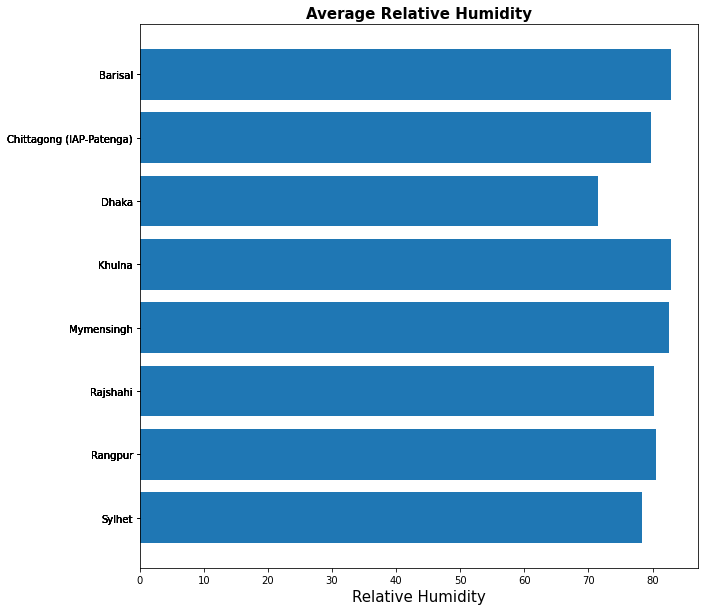

In [35]:
fig, ax = plt.subplots(figsize = (10,10))

ax.barh(station["Station Names"],station["Relative Humidity"], align='center');

ax.set_yticks(station["Station Names"])
ax.set_yticklabels(station["Station Names"])

# labels read top-to-bottom
ax.invert_yaxis()  

#Setting X-axis Label
ax.set_xlabel('Relative Humidity',fontsize=15,fontweight='roman',fontname="Sans")

#Setting Plots Title
ax.set_title('Average Relative Humidity',fontsize=15,fontweight='bold',fontname="Sans");

#Saving Plot
fig.savefig("Horizontal_Bar_Plot.png")

In [36]:
#Extracting Chittagong,Khulna and Sylhet's Data 

chittagong = station[station["Station Names"] == "Chittagong (IAP-Patenga)"]

khulna = station[station["Station Names"] == "Khulna"]

sylhet = station[station["Station Names"] == "Sylhet"]

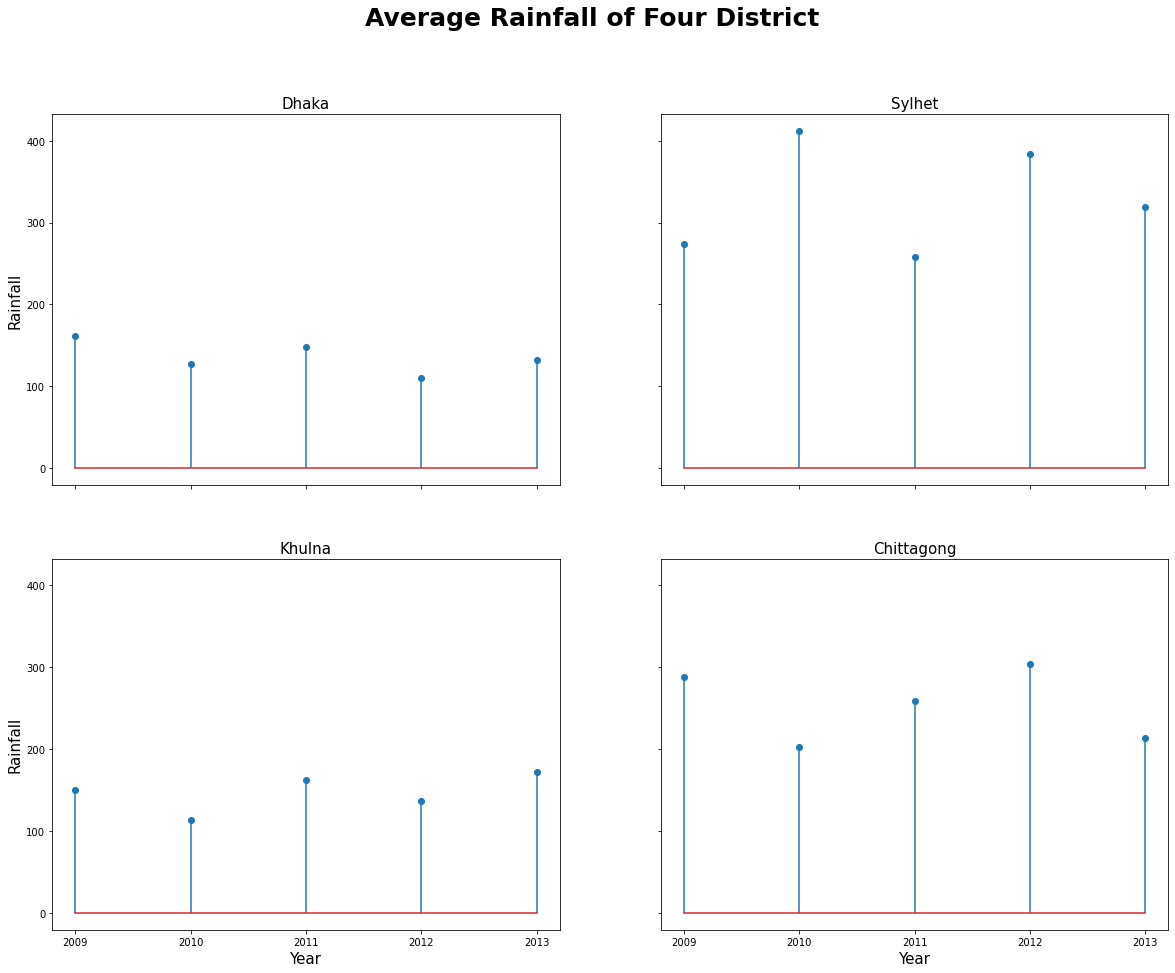

In [37]:
#Figure of Stem Plot

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,15),sharex=True,sharey=True)


ax1.stem(dhk["YEAR"],dhk["Rainfall"],use_line_collection = True)

ax2.stem(sylhet["YEAR"],sylhet["Rainfall"],use_line_collection = True)

ax3.stem(khulna["YEAR"],khulna["Rainfall"],use_line_collection = True)

ax4.stem(chittagong["YEAR"],chittagong["Rainfall"],use_line_collection = True);


# ax1,ax2,ax3, & ax4 Stem Plot Title
ax1.set_title("Dhaka",fontsize=15,fontweight='roman',fontname="Sans")

ax2.set_title("Sylhet",fontsize=15,fontweight='roman',fontname="Sans")

ax3.set_title("Khulna",fontsize=15,fontweight='roman',fontname="Sans")

ax4.set_title("Chittagong",fontsize=15,fontweight='roman',fontname="Sans")

plt.xticks([2009,2010,2011,2012,2013])

#Setting Plots Label
ax3.set_xlabel("Year",fontsize=15,fontweight='roman',fontname="Sans")
ax4.set_xlabel("Year",fontsize=15,fontweight='roman',fontname="Sans")

ax1.set_ylabel("Rainfall",fontsize=15,fontweight='roman',fontname="Sans")
ax3.set_ylabel("Rainfall",fontsize=15,fontweight='roman',fontname="Sans")

#Figure Title,Font-Size,Font-Weight
fig.suptitle("Average Rainfall of Four District",fontsize=25,fontweight='bold',fontname="Sans");

#Saving Plot
fig.savefig("Stem_Plot.png")

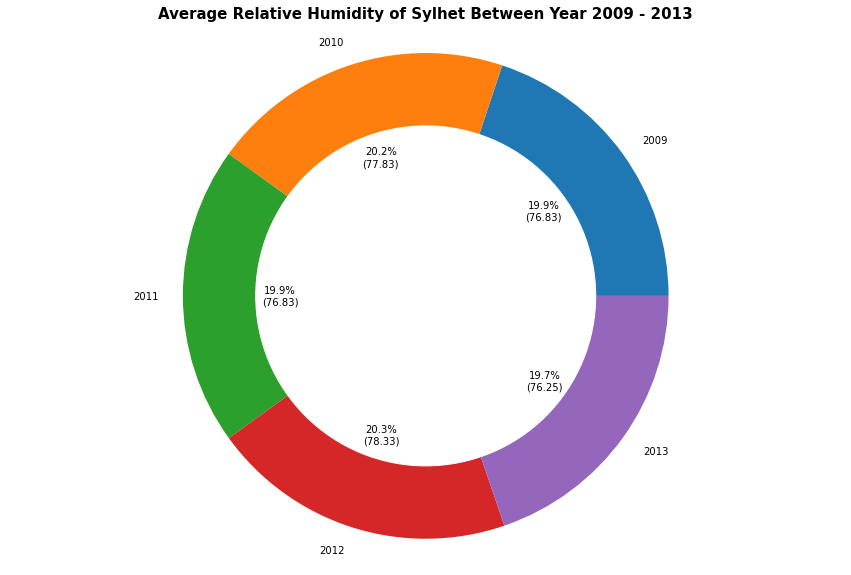

In [38]:
#Figure of Donut Plot
fig, ax = plt.subplots(figsize = (15,10))

#Function for Showing Parcentage and Values
def func(pct, allvalues):
    absolute = pct / 100.*np.sum(allvalues)
    return "{:.1f}%\n({:.2f})".format(pct, absolute)

ax.pie(sylhet["Relative Humidity"],labels=sylhet["YEAR"],autopct = lambda pct: func(pct, sylhet["Relative Humidity"]));

#Creating Donut Plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

ax.axis("equal")

#Setting Plots Title
ax.set_title("Average Relative Humidity of Sylhet Between Year 2009 - 2013",fontsize=15,fontweight='bold',fontname="Sans");

#Saving Plot
fig.savefig("Donut_Plot.png")

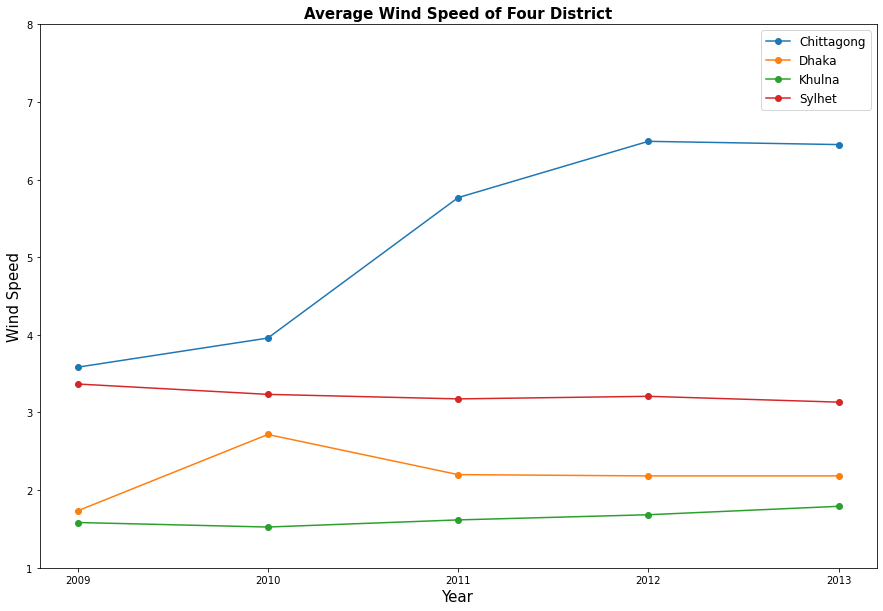

In [39]:
#Figure of Line Plot
fig, ax = plt.subplots(figsize = (15,10))

ax.plot(chittagong["YEAR"],chittagong["Wind Speed"],'-o',label='Chittagong')
ax.plot(dhk["YEAR"],dhk["Wind Speed"],'-o',label='Dhaka')
ax.plot(khulna["YEAR"],khulna["Wind Speed"],'-o',label='Khulna')
ax.plot(sylhet["YEAR"],sylhet["Wind Speed"],'-o',label='Sylhet')

#Plot Legend's Location and Font-size
ax.legend(loc='upper right',fontsize=12)

ax.set_ylim([1,8])

#Plot Title,x-xis and y-axis
ax.set_xlabel("Year",fontweight='roman',fontsize=15,fontname="Sans")
ax.set_ylabel("Wind Speed",fontweight='roman',fontsize=15,fontname="Sans")
ax.set_title("Average Wind Speed of Four District",fontweight='bold',fontsize=15,fontname="Sans")

ax.set_xticks([2009,2010,2011,2012,2013]);

#Saving Plot
fig.savefig("Line_Plot.png")